In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F # adds some efficiency


from torch.utils.data import DataLoader, random_split # lets us load data in batches
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix # for evaluating results
import matplotlib.pyplot as plt


In [3]:
import os

# Path ke folder utama yang berisi folder-folder dengan gambar
main_folder_path = "breastcancer"

# List untuk menyimpan path dari gambar-gambar
image_paths = []

# Iterasi melalui setiap folder dan subfolder di dalam main_folder_path
for root, dirs, files in os.walk(main_folder_path):
    for file in files:
        if file.endswith(('.png')):
            # Jika ya, tambahkan pathnya ke dalam list image_paths
            image_paths.append(os.path.join(root, file))
            #print(image_paths)
# Cetak semua path gambar yang telah dikumpulkan
for path in image_paths:
    print(path)


breastcancer\Cancer\A_1403\A_1403_1.RIGHT_CC.png
breastcancer\Cancer\A_1403\A_1403_1.RIGHT_MLO.png
breastcancer\Cancer\A_1404\A_1404_1.LEFT_CC.png
breastcancer\Cancer\A_1404\A_1404_1.LEFT_MLO.png
breastcancer\Cancer\A_1467\A_1467_1.RIGHT_CC.png
breastcancer\Cancer\A_1467\A_1467_1.RIGHT_MLO.png
breastcancer\Cancer\A_1486\A_1486_1.RIGHT_CC.png
breastcancer\Cancer\A_1486\A_1486_1.RIGHT_MLO.png
breastcancer\Cancer\A_1500\A_1500_1.RIGHT_CC.png
breastcancer\Cancer\A_1500\A_1500_1.RIGHT_MLO.png
breastcancer\Cancer\A_1509\A_1509_1.RIGHT_CC.png
breastcancer\Cancer\A_1509\A_1509_1.RIGHT_MLO.png
breastcancer\Cancer\A_1511\A_1511_1.RIGHT_CC.png
breastcancer\Cancer\A_1511\A_1511_1.RIGHT_MLO.png
breastcancer\Cancer\A_1520\A_1520_1.RIGHT_CC.png
breastcancer\Cancer\A_1520\A_1520_1.RIGHT_MLO.png
breastcancer\Cancer\A_1524\A_1524_1.LEFT_CC.png
breastcancer\Cancer\A_1524\A_1524_1.LEFT_MLO.png
breastcancer\Cancer\A_1527\A_1527_1.LEFT_CC.png
breastcancer\Cancer\A_1527\A_1527_1.LEFT_MLO.png
breastcancer\Can

In [38]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Adjust the size according to the new architecture
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset menggunakan ImageFolder
dataset = datasets.ImageFolder(root=main_folder_path, transform=transform)

# Buat DataLoader untuk datasetaaaaaaaaaaa
data_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)
# Contoh: mencetak beberapa informasi tentang dataset
print("Jumlah sampel dalam dataset:", len(dataset))
print("Jumlah sampel dalam training set:", len(train_dataset))
print("Jumlah sampel dalam testing set:", len(test_dataset))
print("Kelas-kelas dalam dataset:", dataset.classes)


Jumlah sampel dalam dataset: 1023
Jumlah sampel dalam training set: 818
Jumlah sampel dalam testing set: 205
Kelas-kelas dalam dataset: ['Cancer', 'Normal']


In [39]:
# Contoh: mencetak beberapa informasi dari training set
for images, labels in train_loader:
    print(f"Training batch - images: {images.size()}, labels: {labels.size()}")
    break

# Contoh: mencetak beberapa informasi dari testing set
for images, labels in test_loader:
    print(f"Testing batch - images: {images.size()}, labels: {labels.size()}")
    break


Training batch - images: torch.Size([32, 3, 128, 128]), labels: torch.Size([32])
Testing batch - images: torch.Size([32, 3, 128, 128]), labels: torch.Size([32])


In [67]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.drop = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.drop(x)
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x
torch.manual_seed(85)
model = SimpleCNN()

model
# Fungsi untuk melatih model


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
)

Epoch [1/100], Loss: 0.8885, Accuracy: 50.61%, Test Loss: 0.7210, Test Accuracy: 45.37%
Epoch [2/100], Loss: 0.7076, Accuracy: 50.61%, Test Loss: 0.7096, Test Accuracy: 47.32%
Epoch [3/100], Loss: 0.6991, Accuracy: 53.06%, Test Loss: 0.6933, Test Accuracy: 53.17%
Epoch [4/100], Loss: 0.6935, Accuracy: 50.98%, Test Loss: 0.7106, Test Accuracy: 44.39%
Epoch [5/100], Loss: 0.6929, Accuracy: 51.83%, Test Loss: 0.7037, Test Accuracy: 44.88%
Epoch [6/100], Loss: 0.6911, Accuracy: 50.86%, Test Loss: 0.7069, Test Accuracy: 44.88%
Epoch [7/100], Loss: 0.6882, Accuracy: 51.71%, Test Loss: 0.7298, Test Accuracy: 44.39%
Epoch [8/100], Loss: 0.6885, Accuracy: 51.59%, Test Loss: 0.7093, Test Accuracy: 47.32%
Epoch [9/100], Loss: 0.6888, Accuracy: 51.96%, Test Loss: 0.7088, Test Accuracy: 45.37%
Epoch [10/100], Loss: 0.6961, Accuracy: 50.37%, Test Loss: 0.7037, Test Accuracy: 47.32%
Epoch [11/100], Loss: 0.6902, Accuracy: 51.71%, Test Loss: 0.7063, Test Accuracy: 46.34%
Epoch [12/100], Loss: 0.6893, 

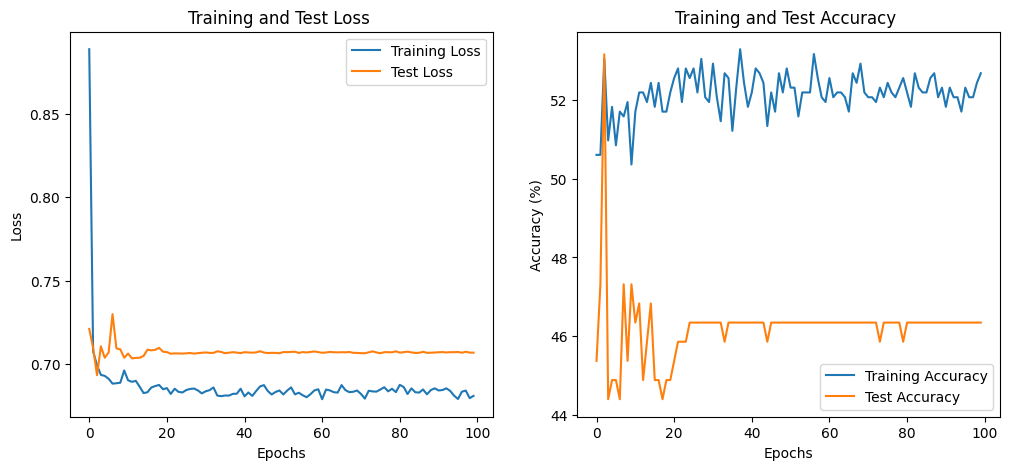

In [77]:
from torch.optim.lr_scheduler import StepLR
model = SimpleCNN()

# Tentukan loss function dan optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

# Fungsi untuk melatih model
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        labels = labels.float().unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Calculate accuracy
        predicted = torch.round(torch.sigmoid(outputs))
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions * 100
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    # Evaluate on the test set
    model.eval()
    test_running_loss = 0.0
    correct_test_predictions = 0
    total_test_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.float().unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            
            # Calculate accuracy
            predicted = torch.round(torch.sigmoid(outputs))
            correct_test_predictions += (predicted == labels).sum().item()
            total_test_predictions += labels.size(0)
    
    test_epoch_loss = test_running_loss / len(test_loader)
    test_epoch_accuracy = correct_test_predictions / total_test_predictions * 100
    test_losses.append(test_epoch_loss)
    test_accuracies.append(test_epoch_accuracy)
    scheduler.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_epoch_loss:.4f}, Test Accuracy: {test_epoch_accuracy:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss ')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy ')
plt.legend()

plt.show()

In [43]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.float().unsqueeze(1)
            outputs = model(inputs)
            predicted = torch.round(torch.sigmoid(outputs))
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test accuracy: {correct}/{total} = {accuracy:.2f}%')
evaluate_model(model, test_loader)

Test accuracy: 109/205 = 53.17%
